In [49]:
include("/Users/meesvandartel/Desktop/LPR FinGrow/Reprod Paper/GrowthBasic.jl")
using .GrowthBasic
using Agents
using Plots
using HypothesisTests
using ProgressMeter
using Statistics
using Base.Threads
using StatsBase

In [10]:
#ADF tests on aggregate and differences series respectively
MC = 1
dates = 1:500
agg_p = []
growth_p=[]
growth_vectors=[]

@showprogress for iter in 1:MC
    model = GrowthBasic.initialize_econ(;seed = rand(Int))
    GDP_series = []
    for t in dates
        GDP = 0
        for agent in allagents(model)
            Q = agent.Q
            GDP += Q
        end
        push!(GDP_series, log(GDP))
        step!(model)
    end
    GDP_series = convert(Vector{Float64}, GDP_series)
    GDP_growth = diff(GDP_series)
    push!(growth_vectors, GDP_growth)

    test_agg = ADFTest(GDP_series, :constant, :0)
    test_growth = ADFTest(GDP_growth,:constant,:0)
    push!(agg_p, pvalue(test_agg))
    push!(growth_p, pvalue(test_growth))
end


In [11]:
c_agg = count(x -> x>0.05, agg_p)
c_growth = count(x -> x>0.05, growth_p)

println("Share of accepted H0= unit root for aggregate: $((c_agg/MC)*100)%")

println("Share of accepted H0= unit root for differenced: $((c_growth/MC)*100)&")

#Aggregare is non-stationary, differences is stationary just as in paper

Share of accepted H0= unit root for aggregate: 100.0%
Share of accepted H0= unit root for differenced: 0.0&


TODO: autocorrelation and ACF

In [45]:
MC = 100
dates = 500
growth_vectors=Vector{Vector{Float64}}(undef, MC)

@showprogress for iter in 1:MC
    model = GrowthBasic.initialize_econ(;seed = rand(Int))
    GDP_series = Vector{Float64}(undef, dates)
    for t in 1:dates
        GDP = 0.0
        @inbounds for agent in allagents(model)
            GDP += agent.Q
        end
        GDP_series[t] = log(GDP)
        step!(model)
    end
    GDP_growth = diff(GDP_series)
    growth_vectors[iter] = GDP_growth

end

print(growth_vectors)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:44


[[-0.09431067947124117, -0.05651221026334241, -0.1638878551051164, -0.14732471475685838, -0.08269171584511348, -0.05310982531394881, -0.0915527267344931, -0.06163604496180941, -0.16057034495627498, -0.13286252893691142, -0.06397737659300695, -0.10756258802066743, -0.10676167913239087, -0.20787130430593947, -0.1975772439474861, 0.06829731447359766, 0.2351819689527206, 0.21749763909698938, 0.03182854283219072, 0.27732299375209735, -0.6795545931328313, 0.5248463329120368, 0.28265382158207775, 0.16778597956208152, 1.014617752082116, 0.17912237984516022, -0.06837751321091456, 0.9505554372296663, -0.05142583544986934, -0.20685924966164926, 0.3911049746905615, 0.5238022272095915, 0.20249432301976888, 0.18649303835704956, 0.2973265884258538, -0.00511648164311751, 0.2246090469001807, 0.8071507136608602, 0.26991876061746645, 0.15360991214504338, 0.6524897115123203, 0.17387980433748318, -0.10640296651047088, 0.5058345209414625, 0.19058383167488735, 0.07777651411524644, 0.06648754916834143, 0.8728

Excessive output truncated after 524301 bytes.

, 0.7154808631075227, 0.0758017087094558, 0.30629881250672497, 0.05511998236428184, 1.197461621399924, 0.18625749819248227, -0.08862993260788699, 0.5653100017619437, 0.013690005275840633, 0.16390155627195213, 0.3613911531685474, 0.2230927923503785, 0.03010296930802525, 0.21045098220760394, -0.19885147791828928, 1.164895418233435, 0.2930075949489961, -0.06184203956087231, 0.14644652023638116, -0.19390978766548983, 0.5306173564150853, 0.6010615221548932, 0.34771702521602066, -0.0009472184720280552, -0.11501549547339351, 1.0582647980416198, 0.31697608973866664, -0.6670875178404216, 1.276627200407944, -1.206036560958296, 2.642750712230722, -0.21741754038710326, 1.0752524086756239, -1.5031607087859413, -0.38986134150139407, 1.5317737015277118, -0.3008994013568014, 1.163539220284484, 0.2967134063725041, 0.23870726985060742, 0.225350559405463, 0.6232584584505645, -0.02999623982314148, 0.965879670750077, 0.018339274679085804, 0.25882042014423945, 0.5275461910657242, 0.027790091402657424, 0.541

In [47]:
test = mean(growth_vectors)
print(test)

[-0.10256488362060676, -0.034191250309457175, -0.04704796257536564, -0.05671415985510404, -0.028162666860396045, 0.13305872398869037, 0.2644390105102742, 0.20790673493614517, 0.16006453299545412, 0.1920002931240327, 0.21080867541521373, 0.31401742797386006, 0.21259228649836118, 0.37183754024234744, 0.2817661818201486, 0.2768084979103642, 0.28989684528580734, 0.2790488584345625, 0.30569209929520597, 0.3359870549850875, 0.28959458073357824, 0.2597647607990944, 0.36169970219741887, 0.25715737662077176, 0.39596230652498166, 0.21732909545363818, 0.2717749969486735, 0.3097158426339297, 0.28437423500627834, 0.3169403794523331, 0.35374020133916817, 0.24421392546278362, 0.37213823755233777, 0.2308542497538277, 0.3023641052070475, 0.364642506299938, 0.23126968628998706, 0.4406904414068407, 0.21309146646133278, 0.32441500075812796, 0.32328388526903806, 0.2968662595828855, 0.122404041115236, 0.31869202150771914, 0.39168965393629773, 0.19808369793638816, 0.33751723339679623, 0.2783030233522059, 0.2

[-0.17644238492220762, 0.19756406151207678, 0.08262629969946915, 0.04611322391263893, 0.02050471267215193, 0.07060918250571421, -0.03957481314610566, 0.1143284375048731, 0.006473017764386682, 0.03234448573634574, 0.011415613077976308, -0.005251714920865483, 0.00376629301227501, -0.017856357953347474, 0.0021649865768986593, 0.0004513905363751312, 0.02505260460559828, 0.05977509924311324, -0.04942584617899375, 0.0018710012971593706, 0.025969113361640123, -0.06637702549875373, 0.014496644768347545, -0.013123243655351995, -0.010743463478281411, 0.026914896165185113, -0.035446240164301784, 0.006301747154175843, 0.033159177885387754, 0.02589632668259946]

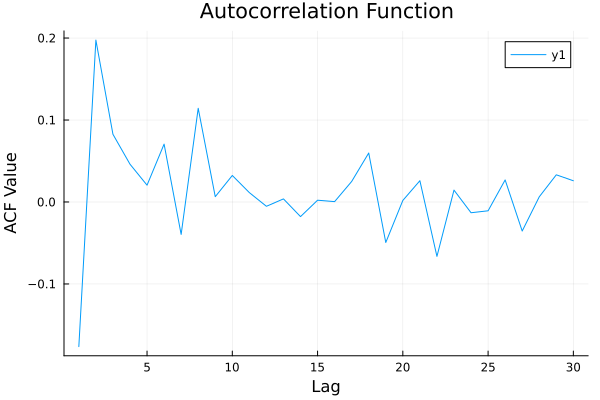

In [77]:
acf_values = autocor(test, collect(1:30); demean = true)
print(acf_values)

plot(acf_values, title="Autocorrelation Function", xlabel="Lag", ylabel="ACF Value")